In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
casas = pd.read_csv("houses_to_rent.csv")

In [82]:
casas['total'] = casas['total'].apply(lambda x: float(x.replace(",",".")))
casas.head(5)

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,"8,000","1,000",121,9.121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1.493
2,2,1,443,5,5,4,3,acept,furnished,"4,172","7,000","1,417",89,12.680
3,3,1,73,2,2,1,12,acept,not furnished,700,"1,250",150,16,2.116
4,4,1,19,1,1,0,-,not acept,not furnished,0,"1,200",41,16,1.257


In [83]:
categorias = ['area', 'rooms', 'bathroom', 'parking spaces']
matriz_x = np.array(casas[categorias], dtype= float)

for x in range(0,4):
    matriz_x.T[x] = (matriz_x.T[x] - matriz_x.T[x].min()) / (matriz_x.T[x].max() - matriz_x.T[x].min())

resultado = casas['total']
vetor_y = np.array(resultado)
vetor_y = (vetor_y - vetor_y.min()) / (vetor_y.max() - vetor_y.min())

In [84]:
tamanho = matriz_x.shape[1]
tamanho

4

In [85]:
#tetas = np.random.randn(5)
tetas = np.array([1,1,1,1,1],dtype=float)


In [86]:
vetor_gradiente = np.zeros(shape = (4), dtype= float)
vetor_gradiente += matriz_x[1]

In [87]:
def hipotese(x, teta):
    total = teta[4]
    return total + x.dot(teta[:-1]).sum()

In [88]:
def custo_total(x, teta, y):
    custo_total = 0
    for x_i,y_i in zip(x,y):
        custo_total += (hipotese(x_i, teta) - y_i)** 2
    return custo_total

In [92]:
tetas = np.array([1,1,1,1,1], dtype=float)
def gradiente (iteracoes, alpha, beta, x, y, teta):
    #Calculando tamanhos de vetores
    m = x.shape[0]
    tetas_size = teta.shape[0]
    vetor_gradiente = np.zeros(shape = tetas_size, dtype= float)
    aux = 0
    lista_x = []
    lista_y = []
    #valor para decrementar de alpha por iteracao:
    beta = (alpha - beta) / iteracoes

    #Loop com numero de iteracoes
    for j in range(iteracoes):
        #Loop por Teta
        for t in range(tetas_size):
            #Loop por numero de linhas do banco
            vetor_gradiente[t] = 0
            for i in range(m):
                #calculando a função de custo de todos as linhas
                aux = (hipotese(x[i], teta) - y[i]) * 2 / m
                if t <= 3:
                    #multiplicando pelo x(i)j quando disponível
                    aux *= x[i][t]
                vetor_gradiente[t] += aux
            #atualizando o vetor de gradiente
        teta = teta - (vetor_gradiente * alpha)
        alpha -= beta
        if j % 10 == 0:
           lista_x.append(j + 1)
           lista_y.append(custo_total(x,teta,y))
    return lista_x,lista_y

In [93]:
eixo_x, eixo_y = gradiente(iteracoes = 500, alpha = 0.7, beta = 0.1,x = matriz_x, y = vetor_y, teta = tetas)

[None]

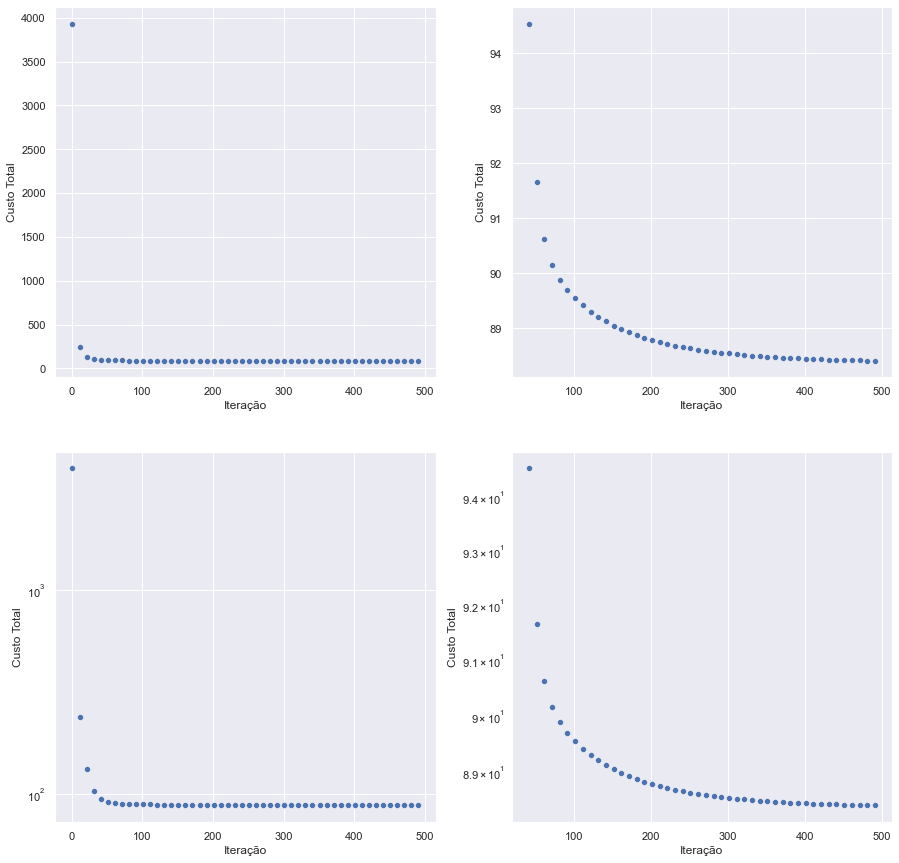

In [151]:
dicionario = {"Iteração" : eixo_x, "Custo Total" : eixo_y}
dados_grafico =pd.DataFrame(dicionario)
dicionario2 = {"Iteração" : eixo_x[4:], "Custo Total" : eixo_y[4:]}
dados_grafico2 = pd.DataFrame(dicionario2)
sns.set()
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(data = dados_grafico, x="Iteração", y="Custo Total", ax=axes[0,0])
sns.scatterplot(data = dados_grafico2, x="Iteração", y="Custo Total", ax=axes[0,1])
sns.scatterplot(data = dados_grafico, x="Iteração", y="Custo Total", ax=axes[1,0]).set(yscale='log')
sns.scatterplot(data = dados_grafico2, x="Iteração", y="Custo Total", ax=axes[1,1]).set(yscale='log')
